In [10]:
# =====================================================
# WEEK 9 (PCA)
# Hands-on: PCA in scikit-learn (Hotel Bookings dataset)
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [11]:
# -------------------------------
# 1) Load dataset
# -------------------------------
url = "https://raw.githubusercontent.com/swapnilsaurav/Dataset/refs/heads/master/hotel_bookings.csv"
df = pd.read_csv(url)

print("Raw shape:", df.shape)
print("Columns:", df.columns.tolist())


Raw shape: (119390, 33)
Columns: ['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [12]:
# -------------------------------
# 2) Keep numeric features + target together (prevents misalignment bugs)
# -------------------------------
target_col = "is_canceled"

numeric_df = df.select_dtypes(include=["int64", "float64"]).copy()

# Safety: drop rows where target missing (rare but keeps alignment perfect)
numeric_df = numeric_df.dropna(subset=[target_col])

X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col].astype(int)

print("\nNumeric-only shape (incl target):", numeric_df.shape)
print("X shape:", X.shape, "y shape:", y.shape)



Numeric-only shape (incl target): (119380, 21)
X shape: (119380, 20) y shape: (119380,)


In [13]:
# -------------------------------
# 3) Train-test split (best practice)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)



In [14]:
# -------------------------------
# 4) Impute missing values (median for numeric)
# -------------------------------
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)


In [15]:
# -------------------------------
# 5) Scale data (MANDATORY for PCA)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)



In [16]:
# -------------------------------
# 6) Apply PCA (Hands-on demo with 2 components)
# -------------------------------
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("\nAfter PCA:")
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape :", X_test_pca.shape)



After PCA:
X_train_pca shape: (89535, 2)
X_test_pca shape : (29845, 2)


In [17]:
# -------------------------------
# 7) Quick interpretation outputs (for demo)
# -------------------------------
print("\nExplained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)
print("Total variance captured by 2 PCs:", pca.explained_variance_ratio_.sum())




Explained variance ratio (PC1, PC2): [0.10077662 0.0901456 ]
Total variance captured by 2 PCs: 0.1909222234305593


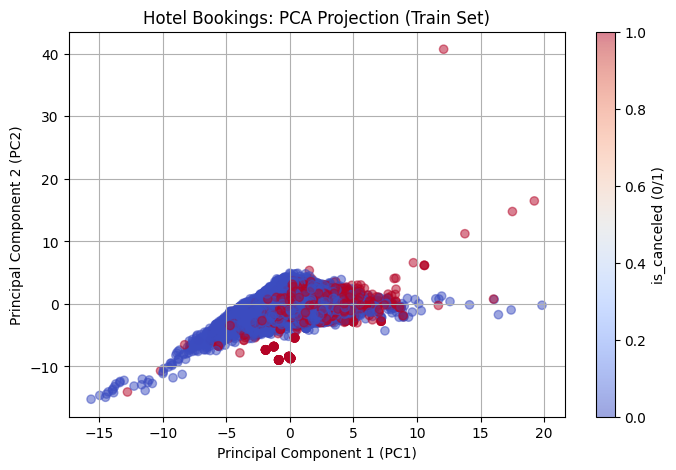

In [18]:
# -------------------------------
# 8) Visualize PCA space (PC1 vs PC2) - Training set
# -------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train.values,          # aligned and safe
    cmap="coolwarm",
    alpha=0.5
)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.title("Hotel Bookings: PCA Projection (Train Set)")
plt.colorbar(label="is_canceled (0/1)")
plt.grid(True)
plt.show()
